# Linear Regression

Linear Regression is usually the first machine learning algorithm that every data scientist comes across. It is a simple model but everyone needs to master it as it lays the foundation for other machine learning algorithms.

Where can Linear Regression be used?
It is a very powerful technique and can be used to understand the factors that influence profitability. It can be used to forecast sales in the coming months by analyzing the sales data for previous months. It can also be used to gain various insights about customer behaviour. By the end of the blog we will build a model which looks like the below picture i.e, determine a line which best fits the data.

This is the first blog of the machine learning series that I am going to cover. One can get overwhelmed by the number of articles in the web about machine learning algorithms. My purpose of writing this blog is two-fold. It can act as a guide to those who are entering into the field of machine learning and it can act as a reference for me.

**Table of Contents**
- What is Linear Regression
- Hypothesis of Linear Regression
- Training a Linear Regression model
- Evaluating the model
- scikit-learn implementation

**What is Linear Regression**

The objective of a linear regression model is to find a relationship between one or more features(independent variables) and a continuous target variable(dependent variable). When there is only feature it is called Uni-variate Linear Regression and if there are multiple features, it is called Multiple Linear Regression.

Hypothesis of Linear Regression:
The linear regression model can be represented by the following equation

y = a1x1 + a2x2 +...... + anxn + b

Let’s create some random data-set to train our model.

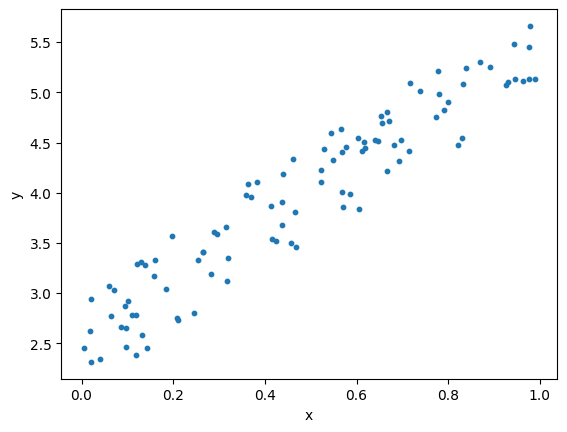

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Training a Linear Regression Model
Training of the model here means to find the parameters so that the model best fits the data.

**How do we determine the best fit line? (Evaluation)**

The line for which the the error between the predicted values and the observed values is minimum is called the best fit line or the regression line. These errors are also called as `residuals`. The residuals can be visualized by the vertical lines from the observed data value to the regression line.

*Our objective is to find the model parameters so that the cost function is minimum. We will use Gradient Descent to find this.*

**Optimization - Gradient descent**

Gradient descent is a generic optimization algorithm used in many machine learning algorithms. It iteratively tweaks the parameters of the model in order to minimize the cost function. The steps of gradient descent is outlined below.

## Implementing Linear Regression from scratch
The complete implementation of linear regression with gradient descent is given below.



In [ ]:
# imports
import numpy as np


class LinearRegressionUsingGD:
    """Linear Regression Using Gradient Descent.
    Parameters
    ----------
    eta : float
        Learning rate
    n_iterations : int
        No of passes over the training set
    Attributes
    ----------
    w_ : weights/ after fitting the model
    cost_ : total error of the model after each iteration
    """

    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta
        self.n_iterations = n_iterations

    def fit(self, x, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        self.cost_ = []
        self.w_ = np.zeros((x.shape[1], 1))
        m = x.shape[0]

        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w_)
            residuals = y_pred - y
            gradient_vector = np.dot(x.T, residuals)
            self.w_ -= (self.eta / m) * gradient_vector
            cost = np.sum((residuals ** 2)) / (2 * m)
            self.cost_.append(cost)
        return self

    def predict(self, x):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        return np.dot(x, self.w_)

## Scikit-learn implementation

sckit-learn is a very powerful library for data-science. The complete code is given below

Slope: [[2.93655106]]
Intercept: [2.55808002]
Root mean squared error:  0.07623324582875007
R2 score:  0.9038655568672764


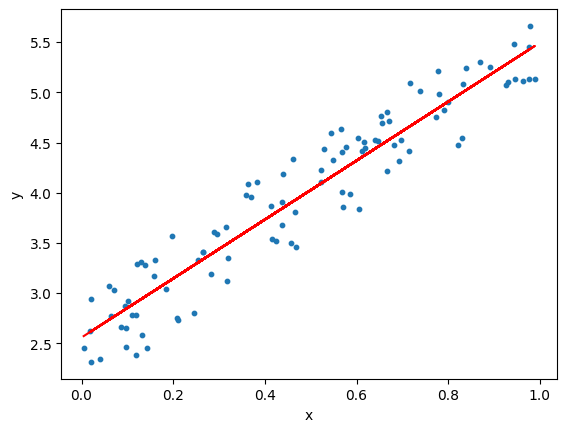

In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# generate random data-set
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.rand(100, 1)

# sckit-learn implementation

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x, y)
# Predict
y_predicted = regression_model.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_) # coefficient
print('Intercept:', regression_model.intercept_) # intercept of the lm formula
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_predicted, color='r')
plt.show()